In [1]:
import os

In [2]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

In [3]:
data_path = '/data/fmri/data'

In [4]:
!ls /data/fmri/data/sub-hc001

0back_VAS-f.1D	2back_VAS-f.1D	sub-hc001.preproc  sub-hc001.preproc.tgz


In [5]:
!ls /data/fmri/data/sub-hc001/sub-hc001.preproc

0back.r01.scale.nii.gz	0back.r04.scale.nii.gz	2back.r03.scale.nii.gz
0back.r02.scale.nii.gz	2back.r01.scale.nii.gz
0back.r03.scale.nii.gz	2back.r02.scale.nii.gz


In [6]:
sd = 'sub-hc001'
sub_dir = os.path.join(data_path, f'{sd}/{sd}.preproc')

In [7]:
print(sub_dir)

/data/fmri/data/sub-hc001/sub-hc001.preproc


In [8]:
for file in os.listdir(sub_dir):
    if not file.endswith('.gz'):
        continue
    img = nib.load(os.path.join(sub_dir, file))
    print(img.shape)

(57, 68, 49, 135)
(57, 68, 49, 135)
(57, 68, 49, 135)
(57, 68, 49, 135)
(57, 68, 49, 135)
(57, 68, 49, 135)
(57, 68, 49, 135)


In [9]:
# Get image as a numpy array
img = img.get_fdata()
img.shape

(57, 68, 49, 135)

- The above shape tells us that the brain was scanned in 49 slices with a resolution of 57x68 voxels per slice.
- The fourth dimension "135" is the number of timesteps

In [10]:
# Take the image from the first timestep
img = img[:, :, :, 0]
img.shape

(57, 68, 49)

In [11]:
# Rotate the image 90 degrees so that the eyes are facing the top
data = np.rot90(img)      

In [12]:
data.shape

(68, 57, 49)

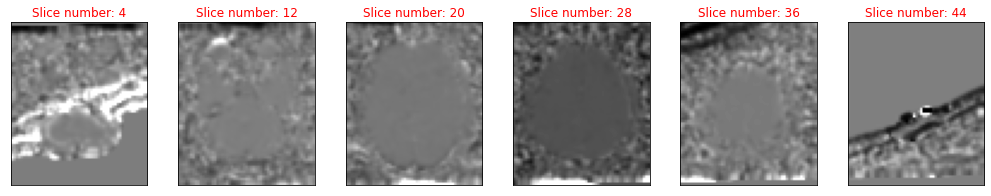

In [13]:
# This way of plotting shows the spatial information about the image on different slices.

fig, ax = plt.subplots(1, 6, figsize=[18, 3])
n_slice = 4
for n in range(6):
    ax[n].imshow(data[:, :, n_slice], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice number: {}'.format(n_slice), color='r')
    n_slice += 8
    
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

- The structural MRI (sMRI) visualize the location of water in the human body
    - So, sMRI scans allow us to visualize and locate anatomical structures within the brain in great detail
    - sMRI images provide a lot of spatial deatil about the brain or other organs under investigation.
    
- On the other hand, functional MRI (fMRI) scans monitor the blood-oxygen-level dependend signal (BOLD signal) over time, which comes at the expense of losing spatial details (hence the above images do not look that clear)
    - The BOLD signal represents changes in the blood oxygenation of brain tissue which can be used as an indirect measure of brain activity but is NOT an equivalent of neural activity

## Working with fMRI data

In [14]:
print(sub_dir)

/data/fmri/data/sub-hc001/sub-hc001.preproc


In [17]:
data_all = nib.load(os.path.join(sub_dir, '0back.r01.scale.nii.gz')).get_fdata()
print(data_all.shape)
# for data_file in os.listdir(sub_dir):
#     if not data_file.endswith('.nii'):
#         continue
#     data = nibabel.load(os.path.join(sub_dir, data_file)).get_data()
#     data_all.append(data.reshape(x_size, y_size, n_slice))
    

(57, 68, 49, 135)


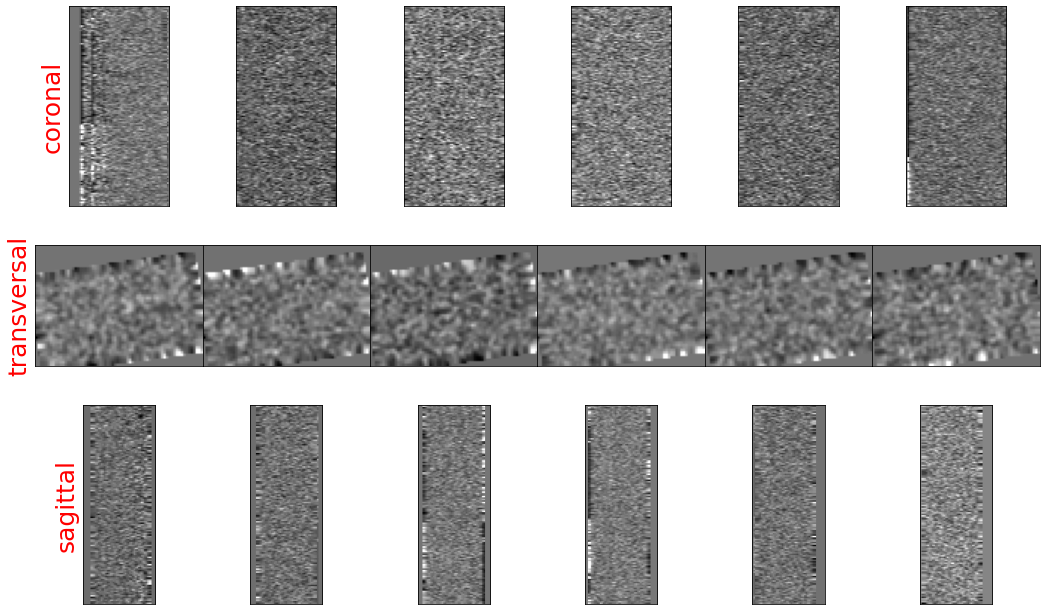

In [18]:
# Create a 3x6 subplot 
fig, ax = plt.subplots(3, 6, figsize=[18, 11])

# Orgaize the data for visualisation in the coronal plane
coronal = np.transpose(data_all, [1, 3, 2, 0])
coronal = np.rot90(coronal, 1)

# Orgaize the data for visualisation in the transversal plane
transversal = np.transpose(data_all, [2, 1, 3, 0])
transversal = np.rot90(transversal, 2)

# Orgaize the data for visualisation in the sagittal plane
sagittal = np.transpose(data_all, [2, 3, 1, 0])
sagittal = np.rot90(sagittal, 1)

# Plot some of the images in different planes
n = 4
for i in range(6):
    ax[0][i].imshow(coronal[:, :, n, 0], cmap='gray')
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])
    if i == 0:
        ax[0][i].set_ylabel('coronal', fontsize=25, color='r')
    n += 6
    
n = 4
for i in range(6):
    ax[1][i].imshow(transversal[:, :, n, 0], cmap='gray')
    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])
    if i == 0:
        ax[1][i].set_ylabel('transversal', fontsize=25, color='r')
    n += 6

n = 4
for i in range(6):
    ax[2][i].imshow(sagittal[:, :, n, 0], cmap='gray')
    ax[2][i].set_xticks([])
    ax[2][i].set_yticks([])
    if i == 0:
        ax[2][i].set_ylabel('sagittal', fontsize=25, color='r')
    n += 6

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

### Caudate Mask

In [19]:
mask = nib.load('/data/fmri/mask/caudate_mask.nii')
mask.shape

(161, 191, 151)

In [20]:
img = nib.load('/data/fmri/data/sub-hc002/pb04.sub-hc002.r01_0back.scale+tlrc.nii')
img.shape

FileNotFoundError: No such file or no access: '/data/fmri/data/sub-hc002/pb04.sub-hc002.r01_0back.scale+tlrc.nii'

In [ ]:
img = img.slicer[:, :, :, 0:5]
img.shape

In [ ]:
from nilearn import masking
from nilearn import image

In [ ]:
img_affine = np.array([[ -3.,   -0.,   -0.,   79.5],
 [ -0.,   -3.,   -0.,   79.5],
 [  0.,    0.,    3.,  -63.5],
 [  0.,    0.,    0.,    1. ]])

In [ ]:
mask = image.resample_img(mask, target_affine=img_affine, target_shape=img.shape[:3])
mask.shape

In [ ]:
new_img = masking.apply_mask(img, mask)

In [ ]:
new_img.shape

In [ ]:
plt.imshow(new_img)